# Punktacja czasopism w dyscyplinach AEE i ITT
Celem niniejszego dokumentu jest przedstawienie podstawowych informacji statystycznych o czasopismach piunktowanych przez MNISW (lista z lipca 2019).
Przygotowane pliki będzie łatwo jednak skonwertować na listę z nowymi danymi.

In [40]:
import pandas as pd
dane=pd.read_csv('../Analysis Data/Punktacja_MNISW_oraz_IF_dla_AEE_i_ITT.csv')
dane.set_index('Numer z listy MNISW',inplace=True)
dane['Punkty']=dane['Punkty'].astype('category')
dane.head()

,Tytuł,issn,e-issn,AEE,ITT,Punkty,IF
Numer z listy MNISW,,,,,,,
1,2D Materials,2053-1583,2053-1583,True,False,140,7.343
6,3D Printing and Additive Manufacturing,2329-7662,2329-7670,True,False,100,3.259
7,3D Research,2092-6731,2092-6731,True,True,40,NaN
10,4OR-A Quarterly Journal of Operations Research,1619-4500,1614-2411,False,True,70,2.056
76,ACM Communications in Computer Algebra,1932-2232,1932-2240,True,True,20,NaN


## Czasopisma z AEE z podziałem na punktacje

In [30]:
dane[dane.AEE].loc[:,['AEE','Punkty']].groupby(['Punkty']).count()

,AEE
Punkty,
20,505
40,396
70,391
100,262
140,170
200,70


In [31]:
print('Sumaryczna liczba czasopism w dyscyplinie AEE: '+str(sum(dane.AEE)))

Sumaryczna liczba czasopism w dyscyplinie AEE: 1794


## Czasopisma z ITT z podziałem na punktacje

In [32]:
dane[dane.ITT].loc[:,['ITT','Punkty']].groupby(['Punkty']).count()

,ITT
Punkty,
20,606
40,475
70,494
100,386
140,249
200,85


In [33]:
print('Sumaryczna liczba czasopism w dyscyplinie ITT: '+str(sum(dane.ITT)))

Sumaryczna liczba czasopism w dyscyplinie ITT: 2295


## Czasopisma z wspólne z podziałem na punktacje

In [34]:
dane[dane.AEE&dane.ITT].loc[:,['AEE','ITT','Punkty']].groupby(['Punkty']).count()

,AEE,ITT
Punkty,,
20,219,219
40,176,176
70,162,162
100,126,126
140,95,95
200,32,32


In [16]:
print('Sumaryczna liczba czasopism wspólnych dla obu dyscyplin: '+str(sum(dane.ITT&dane.AEE)))

Sumaryczna liczba czasopism wspólnych dla obu dyscyplin: 810


## Związki punktacji MNISW z IF w dyscyplinie AEE

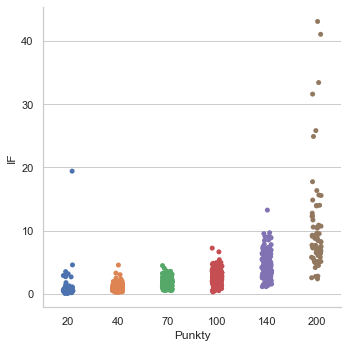

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid", color_codes=True)

sns.catplot(x="Punkty", y="IF", data=dane[dane.AEE]);

#dane[dane.AEE].plot(kind='scatter',x='IF',y='Punkty',yticks=dane.Punkty.unique())
#plt.show()

- Jak widać związków nie ma. 
- Dla 20 punktowych jest kilka zaskakujących outlierów. W szczególności **Science Robotics**, które chyba powinno mieć 200.

### Najwyższe impact factory w AEE:


In [80]:
dane[dane.AEE].sort_values('IF',ascending=False).loc[:,['Tytuł','Punkty','IF']].head(20)

,Tytuł,Punkty,IF
Numer z listy MNISW,,,
14801,NATURE,200,43.070
18197,SCIENCE,200,41.037
14826,Nature Nanotechnology,200,33.407
14828,Nature Photonics,200,31.583
430,ADVANCED MATERIALS,200,25.809
424,Advanced Energy Materials,200,24.884
18241,Science Robotics,20,19.400
8005,IEEE TRANSACTIONS ON PATTERN ANALYSIS AND MACH...,200,17.730
133,ACS Energy Letters,200,16.331


### Czasopisma z IEEE dla AEE

In [85]:
pd.set_option('display.max_rows', 500)
IEEE=dane[dane.AEE&dane['Tytuł'].str.contains('IEEE')].sort_values(['Punkty','IF'],ascending=False)
IEEE[IEEE.AEE].loc[:,['Tytuł','Punkty']]

,Tytuł,Punkty
Numer z listy MNISW,,
8005,IEEE TRANSACTIONS ON PATTERN ANALYSIS AND MACH...,200
8001,IEEE Transactions on Neural Networks and Learn...,200
16512,PROCEEDINGS OF THE IEEE,200
8017,IEEE Transactions on Smart Grid,200
7966,IEEE Transactions on Cybernetics,200
7899,IEEE Internet of Things Journal,200
7977,IEEE TRANSACTIONS ON FUZZY SYSTEMS,200
7976,IEEE TRANSACTIONS ON EVOLUTIONARY COMPUTATION,200
8019,IEEE Transactions on Sustainable Energy,200


In [71]:
print('Czasopisma z IEEE dla AEE: '+str(sum(IEEE.AEE)))
print('Czasopisma z IEEE dla ITT: '+str(sum(IEEE.ITT)))

Czasopisma z IEEE dla AEE: 139
Czasopisma z IEEE dla ITT: 94


## Czasopisma z MDPI dla AEE


In [87]:
MDPI=pd.read_csv('../Analysis Data/MDPI_journals.csv')

MDPI_filter=((dane.issn.isin(MDPI.ISSN)) | (dane['e-issn'].isin(MDPI.ISSN)))

MDPI_table=dane[MDPI_filter].sort_values(['Punkty','IF'],ascending=False)
MDPI_table[MDPI_table.AEE].loc[:,['Tytuł','Punkty']]

,Tytuł,Punkty
Numer z listy MNISW,,
17163,Remote Sensing,100
18379,SENSORS,100
5672,Energies,100
5580,Electronics,100
14742,Nanomaterials,70
14348,Micromachines,70
1518,Applied Sciences-Basel,70
19200,Symmetry-Basel,70
558,Aerospace,70


In [74]:
print('Czasopisma z MDPI dla AEE: '+str(sum(MDPI_table.AEE)))
print('Czasopisma z MDPI dla ITT: '+str(sum(MDPI_table.ITT)))

Czasopisma z MDPI dla AEE: 18
Czasopisma z MDPI dla ITT: 22


## Czasopisma z Elseviera dla AEE

In [78]:
elsevier=pd.read_csv('../Analysis Data/elsevier_journals.csv')
elsevier_filter=((dane.issn.isin(elsevier.ISSN)) | (dane['e-issn'].isin(elsevier.ISSN)))


In [89]:
pd.set_option('display.max_rows', 500)
elsevier_table=dane[elsevier_filter].sort_values(['Punkty','IF'],ascending=False)
elsevier_table[elsevier_table.AEE].loc[:,['Tytuł','Punkty']]

,Tytuł,Punkty
Numer z listy MNISW,,
14731,Nano Energy,200
19142,SURFACE SCIENCE REPORTS,200
17178,RENEWABLE & SUSTAINABLE ENERGY REVIEWS,200
16630,PROGRESS IN SURFACE SCIENCE,200
1463,APPLIED ENERGY,200
473,ADVANCES IN COLLOID AND INTERFACE SCIENCE,200
17166,REMOTE SENSING OF ENVIRONMENT,200
5679,ENERGY CONVERSION AND MANAGEMENT,200
16588,PROGRESS IN AEROSPACE SCIENCES,200


In [77]:
print('Czasopisma z Elseviera dla AEE: '+str(sum(elsevier_table.AEE)))
print('Czasopisma z Elseviera dla ITT: '+str(sum(elsevier_table.ITT)))

Czasopisma z Elseviera dla AEE: 206
Czasopisma z Elseviera dla ITT: 259
